In [109]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [111]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [112]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

In [113]:
# Define a function to map ages to age groups
def assign_age_group(age):
    if age <= 17:
        return 'Children'
    elif age <= 35:
        return 'Young Adults'
    elif age <= 59:
        return 'Adults (Middle Age)'
    else:
        return 'Senior Citizens'

# Apply the function to create an 'AgeGroup' column
df['AgeGroup'] = df['Age'].apply(assign_age_group)

# Count the occurances of each age group
age_group_counts = df['AgeGroup'].value_counts()

print(age_group_counts)

Adults (Middle Age)    52587
Young Adults           33424
Senior Citizens         9682
Children                7901
Name: AgeGroup, dtype: int64


C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\343198831.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = df['Age'].apply(assign_age_group)


In [114]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'AgeGroup'],
      dtype='object')

In [115]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3493111527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Satisfaction_Numerical'] = np.where(df['satisfaction'] == 'satisfied', 1, 0)


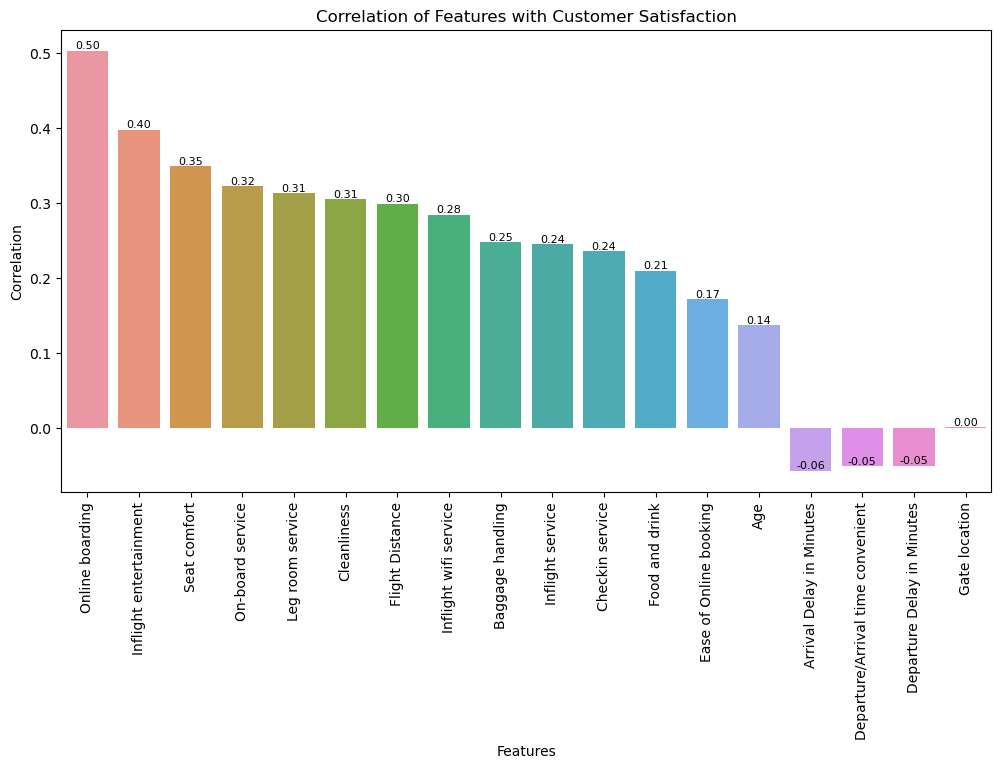

In [116]:
# Select only the numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number])

# Convert the 'satisfaction' column to numerical
df['Satisfaction_Numerical'] = np.where(df['satisfaction'] == 'satisfied', 1, 0)

# Define a dictionary to store correlation
correlation_dict = {}

# Loop through numeric columns and calculate correlation with satisfaction
for column in numeric_columns.columns:
    if column != 'Satisfaction_Numerical':
        correlation, _ = pointbiserialr(numeric_columns[column], df['Satisfaction_Numerical'])
        correlation_dict[column] = correlation

# Sort the dictionary in descending order
sorted_correlation = {x: y for x, y in sorted(correlation_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

# Graphs
plt.figure(figsize=(12, 6))
barPlot = sns.barplot(x=list(sorted_correlation.keys()), y=list(sorted_correlation.values()))
plt.xticks(rotation=90)
plt.title("Correlation of Features with Customer Satisfaction")
plt.xlabel('Features')
plt.ylabel('Correlation')

# correlation value above each bar
for bar, correlation in zip(barPlot.patches, sorted_correlation.values()):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{correlation:.2f}', ha='center', va='bottom', fontsize=8, color='black'
    )
plt.show()

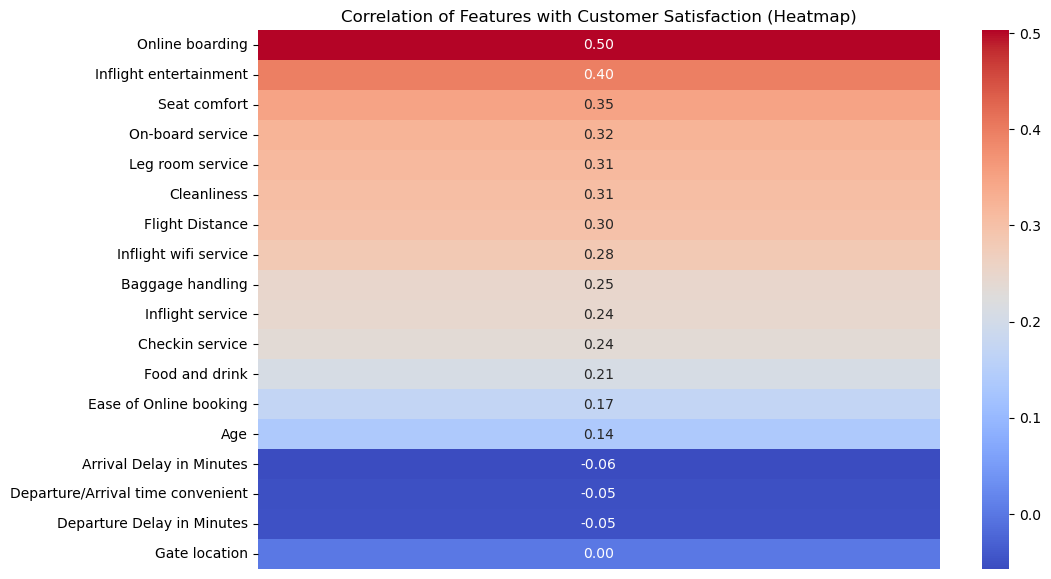

In [117]:
# Calculate correlations
correlation_matrix = numeric_columns.corrwith(df['Satisfaction_Numerical'])

# Sort the correlation  in descending order
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)
correlation_matrix = correlation_matrix[sorted_correlation.index]

# Exclude 'Satisfaction_Numerical' from the heatmap
correlation_matrix = correlation_matrix.drop('Satisfaction_Numerical', errors='ignore')

# Heatmap
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, xticklabels=False)
plt.title("Correlation of Features with Customer Satisfaction (Heatmap)")
plt.show()

In [118]:
# Group data by 'AgeGroup' and calculate correlation for each group
age_groups = df['AgeGroup'].unique()
correlation_results = {}

for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    correlation_matrix = subset.corr()
    sortedCorrelation = correlation_matrix['Satisfaction_Numerical'].abs().sort_values(ascending=False)
    correlation_results[age_group] = sortedCorrelation

# Compare for different age groups
for age_group, correlations in correlation_results.items():
    print(f"Age Group: {age_group}")
    print(correlations)
    print('\n')

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3947182694.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


Age Group: Children
Satisfaction_Numerical               1.000000
Online boarding                      0.384768
Inflight wifi service                0.338050
Ease of Online booking               0.252514
Food and drink                       0.134483
Flight Distance                      0.132487
Inflight entertainment               0.129838
Cleanliness                          0.128797
Seat comfort                         0.119014
Age                                  0.104681
Arrival Delay in Minutes             0.096402
Departure Delay in Minutes           0.089646
Checkin service                      0.084127
On-board service                     0.071267
Inflight service                     0.052515
Departure/Arrival time convenient    0.051410
Baggage handling                     0.047895
Gate location                        0.016273
Leg room service                     0.012256
Name: Satisfaction_Numerical, dtype: float64


Age Group: Young Adults
Satisfaction_Numerical             

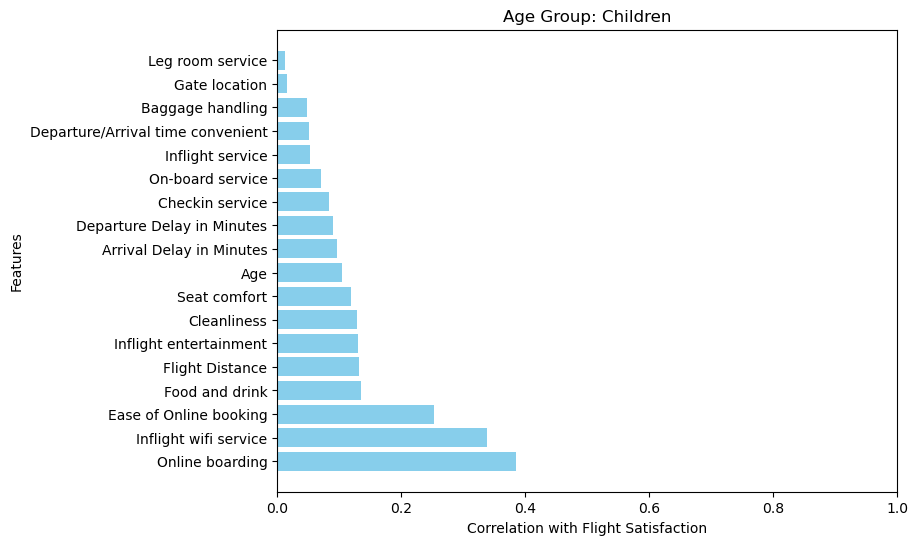

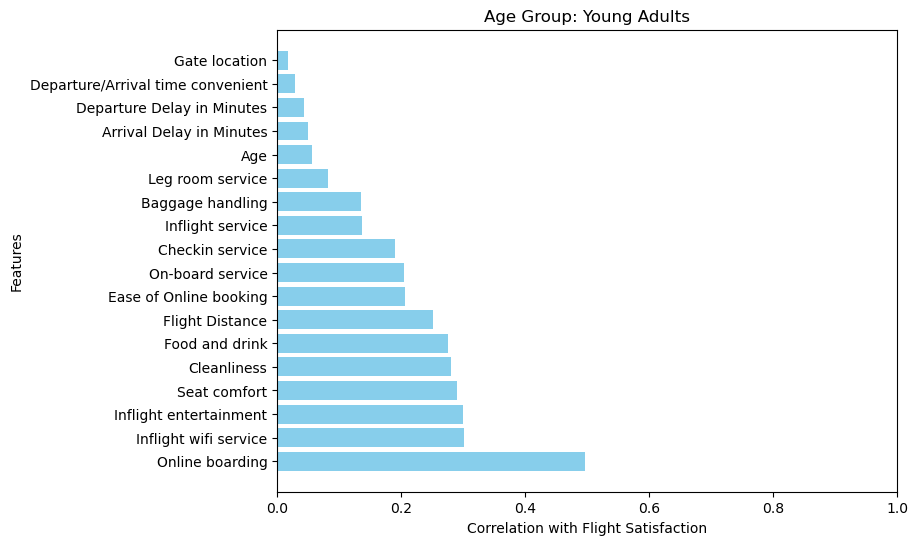

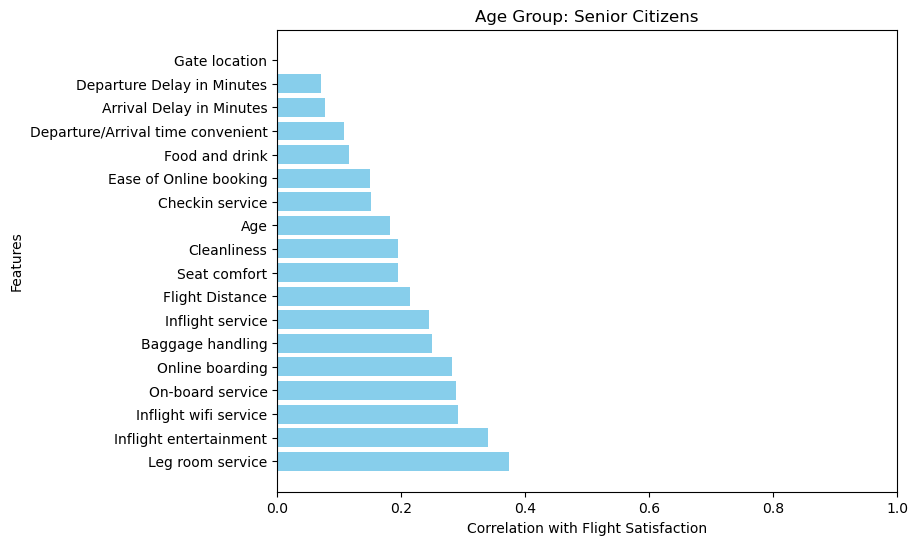

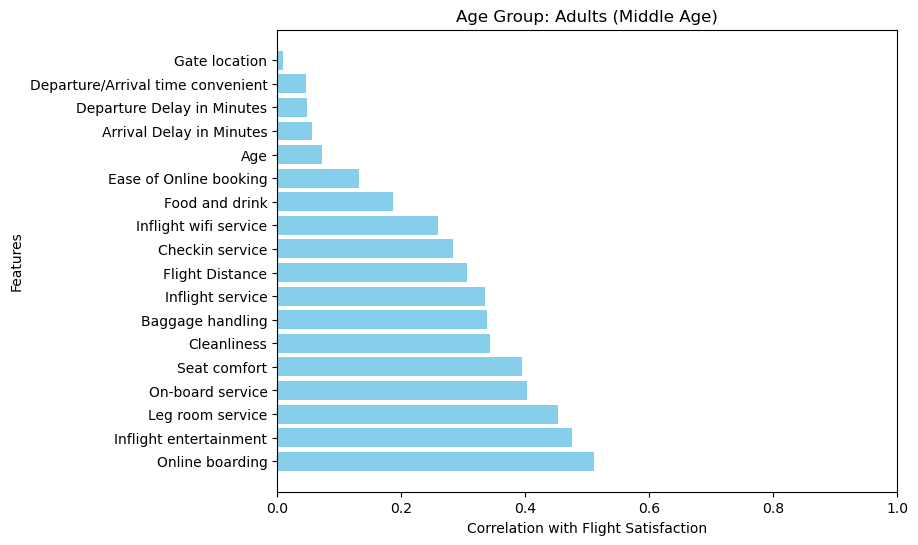

In [119]:
# Plot correlations for each age group
for age_group, correlations in correlation_results.items():
    # Exclude 'Satisfaction_Numerical' from the correlations
    correlations = correlations[correlations.index != 'Satisfaction_Numerical']

    # Create a bar plot for the current age group
    plt.figure(figsize=(8, 6))
    plt.barh(correlations.index, correlations.values, color='skyblue')
    plt.xlim(0, 1)
    plt.xlabel('Correlation with Flight Satisfaction')
    plt.ylabel('Features')
    plt.title(f'Age Group: {age_group}')

In [120]:
# Mean values for each age group
seniors = df[df['AgeGroup'] == 'Senior Citizens']
middle = df[df['AgeGroup'] == 'Adults (Middle Age)']
adults = df[df['AgeGroup'] == 'Young Adults']
children = df[df['AgeGroup'] == 'Children']
print(seniors.mean())
print(middle.mean())
print(adults.mean())
print(children.mean())

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3421343188.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(seniors.mean())


Age                                    65.002479
Flight Distance                      1042.152138
Inflight wifi service                   2.612477
Departure/Arrival time convenient       3.315431
Ease of Online booking                  2.670213
Gate location                           2.944846
Food and drink                          3.119603
Online boarding                         3.253976
Seat comfort                            3.424396
Inflight entertainment                  3.173208
On-board service                        3.210804
Leg room service                        3.077463
Baggage handling                        3.363045
Checkin service                         3.198306
Inflight service                        3.377711
Cleanliness                             3.166185
Departure Delay in Minutes             14.305722
Arrival Delay in Minutes               14.651828
Satisfaction_Numerical                  0.270502
dtype: float64


C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3421343188.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(middle.mean())


Age                                    46.710993
Flight Distance                      1323.145226
Inflight wifi service                   2.795368
Departure/Arrival time convenient       3.064693
Ease of Online booking                  2.818453
Gate location                           2.984369
Food and drink                          3.242474
Online boarding                         3.542472
Seat comfort                            3.661913
Inflight entertainment                  3.516972
On-board service                        3.519425
Leg room service                        3.499971
Baggage handling                        3.654439
Checkin service                         3.382452
Inflight service                        3.656550
Cleanliness                             3.384106
Departure Delay in Minutes             14.514386
Arrival Delay in Minutes               14.896876
Satisfaction_Numerical                  0.549394
dtype: float64
Age                                    26.791736
Fligh

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3421343188.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(adults.mean())
C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3421343188.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(children.mean())


In [121]:
# Filter satisfied passengers
satisfied = df[df['satisfaction'] == 'satisfied']

# Group the data by the 'AgeGroup' column
satisfiedAgeGroup = satisfied['AgeGroup'].value_counts().sort_index()

# Calculate the total count of passengers in each age group
total= df['AgeGroup'].value_counts().sort_index()

# Calculate the percentage of satisfied passengers in each group
percentage = (satisfiedAgeGroup / total) * 100

print(percentage.sort_values())

Children               16.390330
Senior Citizens        27.050196
Young Adults           36.177597
Adults (Middle Age)    54.939434
Name: AgeGroup, dtype: float64


In [122]:
df.info()
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [123]:
# Non-numerical columns to numerical
df.loc[:, 'Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 2])
df.loc[:, 'Customer Type'] = df['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [1, 2])
df.loc[:, 'Type of Travel'] = df['Type of Travel'].replace(['Personal Travel', 'Business travel'], [1, 2])
df.loc[:, 'Class'] = df['Class'].replace(['Eco Plus', 'Business', 'Eco'], [1, 2, 3])

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\1035676360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 2])
C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\1035676360.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 2])
C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\1035676360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [124]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,AgeGroup,Satisfaction_Numerical
0,1,1,13,1,1,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,Children,0
1,1,2,25,2,2,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,Young Adults,0
2,2,1,26,2,2,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,Young Adults,1
3,2,1,25,2,2,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,Young Adults,0
4,1,1,61,2,2,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,Senior Citizens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,2,23,2,3,192,2,1,2,3,...,1,4,2,3,2,3,0.0,neutral or dissatisfied,Young Adults,0
103900,1,1,49,2,2,2347,4,4,4,4,...,5,5,5,5,4,0,0.0,satisfied,Adults (Middle Age),1
103901,1,2,30,2,2,1995,1,1,1,3,...,2,4,5,5,4,7,14.0,neutral or dissatisfied,Young Adults,0
103902,2,2,22,2,3,1000,1,1,1,5,...,5,1,5,4,1,0,0.0,neutral or dissatisfied,Young Adults,0


In [125]:
df = df.drop(['AgeGroup'], axis=1)

In [126]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
selected_features = ['Inflight entertainment', 'Online boarding', 'Seat comfort', 'Cleanliness', 'On-board service']

# Prepare data
X = df[selected_features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters
n_clusters = 2

# Fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


c:\Users\Shaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [127]:
from sklearn.metrics import completeness_score, homogeneity_score, calinski_harabasz_score

# Evaluate clusters
completeness = completeness_score(df['Satisfaction_Numerical'], df['Cluster'])
homogeneity = homogeneity_score(df['Satisfaction_Numerical'], df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f"Completeness Score: {completeness}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Completeness Score: 0.15746080436505197
Homogeneity Score: 0.15694253176158776
Calinski-Harabasz Score: 65011.468998128104


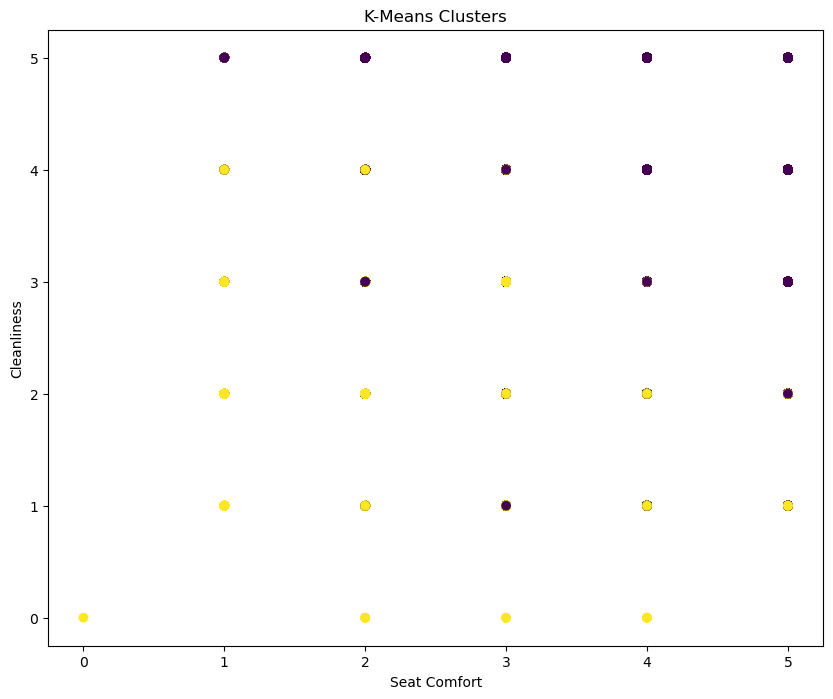

In [128]:
# # Visualize
plt.figure(figsize=(10, 8))
plt.scatter(df['Seat comfort'], df['Cleanliness'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Seat Comfort')
plt.ylabel('Cleanliness')
plt.title('K-Means Clusters')
plt.show()

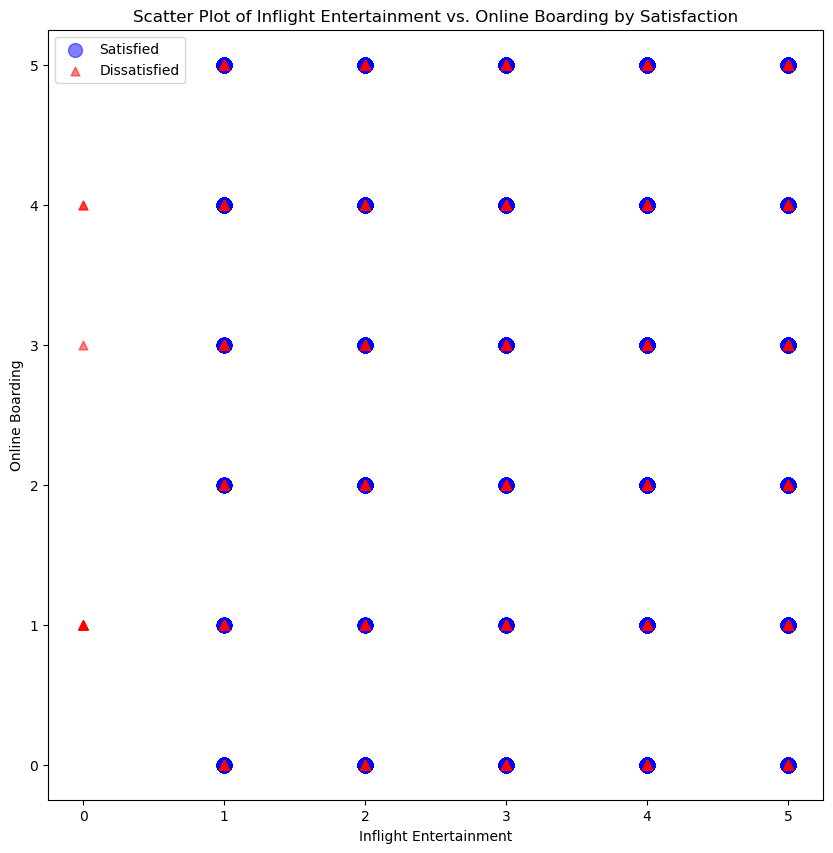

In [129]:
# Separate the data into satisfied and dissatisfied passengers
satisfied_passengers = df[df['Satisfaction_Numerical'] == 1]
dissatisfied_passengers = df[df['Satisfaction_Numerical'] == 0]

# Create a scatter plot
plt.figure(figsize=(10, 10))

# Plot satisfied passengers as blue circles
plt.scatter(satisfied_passengers['Inflight entertainment'], satisfied_passengers['Online boarding'], 
            label='Satisfied', color='blue', marker='o', alpha=0.5, s=100)

# Plot dissatisfied passengers as red triangles
plt.scatter(dissatisfied_passengers['Inflight entertainment'], dissatisfied_passengers['Online boarding'], 
            label='Dissatisfied', color='red', marker='^', alpha=0.5, s=40)

# Add labels and legend
plt.xlabel('Inflight Entertainment')
plt.ylabel('Online Boarding')
plt.legend()

# Set title and labels
plt.title('Scatter Plot of Inflight Entertainment vs. Online Boarding by Satisfaction')
plt.show()

In [130]:
legRoom_high = df[df['Leg room service'] >= 4]
legRoom_low = df[df['Leg room service'] < 4]

print('Seat Comfort Avg Rating (Good Leg Room): ', legRoom_high['Seat comfort'].mean())
print('Seat Comfort Avg Rating (Bad Leg Room): ', legRoom_low['Seat comfort'].mean())

Seat Comfort Avg Rating (Good Leg Room):  3.595951447385701
Seat Comfort Avg Rating (Bad Leg Room):  3.2742240162255674


In [131]:
avg_satisfied = satisfied_passengers.mean()
avg_dissatisfied = dissatisfied_passengers.mean()

print(avg_satisfied)
print('\n')
print(avg_dissatisfied)
print('\n')
diff_sat_dis = avg_satisfied - avg_dissatisfied
print(diff_sat_dis)

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3519228032.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_satisfied = satisfied_passengers.mean()


Gender                                  1.500457
Customer Type                           1.099873
Age                                    41.748558
Type of Travel                          1.927323
Class                                   2.152237
Flight Distance                      1530.180302
Inflight wifi service                   3.161191
Departure/Arrival time convenient       2.969887
Ease of Online booking                  3.031316
Gate location                           2.977682
Food and drink                          3.520814
Online boarding                         4.027285
Seat comfort                            3.966234
Inflight entertainment                  3.965276
On-board service                        3.857585
Leg room service                        3.822438
Baggage handling                        3.966345
Checkin service                         3.645656
Inflight service                        3.969887
Cleanliness                             3.744081
Departure Delay in M

C:\Users\Shaf\AppData\Local\Temp\ipykernel_12472\3519228032.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_dissatisfied = dissatisfied_passengers.mean()


In [132]:
print(satisfied_passengers['Class'].mode())
print(dissatisfied_passengers['Class'].mode())
print('\n')
print('Satisfied Group:')
print(satisfied_passengers['Class'].value_counts())
print('\nDissatisfied Group:')
print(dissatisfied_passengers['Class'].value_counts())

0    2
Name: Class, dtype: int64
0    3
Name: Class, dtype: int64


Satisfied Group:
2    34390
3     8671
1     1836
Name: Class, dtype: int64

Dissatisfied Group:
3    37922
2    15143
1     5632
Name: Class, dtype: int64


In [133]:
long_flight = df[df['Flight Distance'] >= 850]
short_flight = df[df['Flight Distance'] < 850]

print(long_flight['Inflight entertainment'].mean())
print(short_flight['Inflight entertainment'].mean())

print(long_flight['Inflight entertainment'].corr(long_flight['Satisfaction_Numerical']))
print(short_flight['Inflight entertainment'].corr(short_flight['Satisfaction_Numerical']))

print(long_flight['Class'].mode())
print(short_flight['Class'].mode())

3.475806137928352
3.2425827966881324
0.46290996296974307
0.31799775152176074
0    2
Name: Class, dtype: int64
0    3
Name: Class, dtype: int64
